#                              ECS308/658  Assingment 2 part1A or part 1B

       Name: Deep Pooja
       Roll No.: 17074

#  Part1A

# Dataset Reading and Proccessing

In [96]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
#importing liberies different error function 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error

from sklearn.model_selection import train_test_split
%matplotlib inline
data = pd.read_csv(r"C:\Users\hp\Downloads\HAPT Data Set\Gaussian_noise.csv",names=["X", "t"])
print(data.shape)
d = data.iloc[0:20,:] # taking first 20 sample data points
# extracting features and target set of data "d"
X = d.iloc[:,0:1]
Y = d.iloc[:,1]
# extracting features and target set of data "data"
x = data.iloc[:,0:1]
y = data.iloc[:,1]
print(d.head())
data.describe()

(100, 2)
         X       t
0 -0.24890  8.0050
1 -0.15351  7.9964
2  0.75275  8.0395
3 -0.34430  8.0695
4  1.25360  8.0277


,X,t
count,100.000000,100.000000
mean,0.240000,8.092878
std,0.691889,0.152974
min,-0.940520,7.986200
25%,-0.350260,8.001000
50%,0.240000,8.019300
75%,0.830260,8.084075
max,1.420500,8.528000


# Visualizing the dataset 

Text(0.5,1,'Plotting first 100 points')

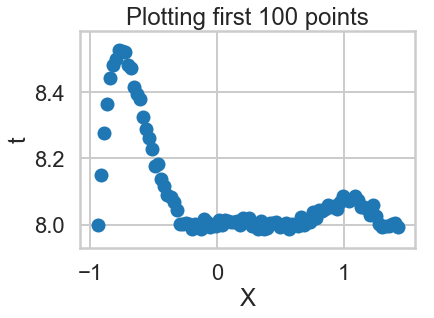

In [124]:
plt.scatter(data['X'],data['t'])
plt.xlabel('X')
plt.ylabel('t')
plt.title('Plotting first 100 points')

# Fitting Polynomial to the dataset 
* It looks like data is neither linear nor quadractic. So consider a simple model initially a 3rd degree polynimial
* let's fit a 3rd degree polynomial and see how good it fits the data

In [119]:
poly = PolynomialFeatures(degree = 7) # this is the model
X_poly = poly.fit_transform(x) 
  
poly.fit(X_poly, y) 
polynomial_model= LinearRegression() 
polynomial_model.fit(X_poly, y)
coefficient = polynomial_model.coef_  # coe
intercept = polynomial_model.intercept_ #intercept
print(intercept)
print(coefficient)
y_predicted = polynomial_model.predict(poly.fit_transform(x))

8.002144160116925
[ 0.          0.08578064 -0.01674391 -1.4437579   2.32327251  0.68517352
 -2.56216065  1.00083176]


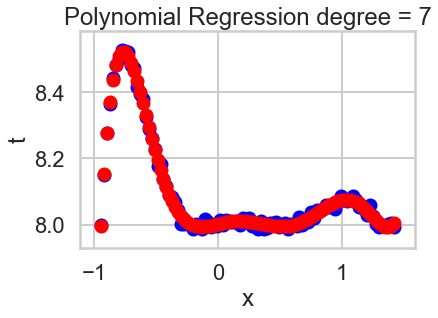

In [123]:
# Visualising the Polynomial Regression results 

plt.scatter(x, y, color = 'blue') 
  
plt.scatter(x, y_predicted , color = 'red') 
plt.title('Polynomial Regression degree = 7') 
plt.xlabel('x') 
plt.ylabel('t') 
  
plt.show() 

* Not bad!, 3 degree polyomial is fittig the data quite nicely
* Fuction below use cross validation approach to calculate the error in curve fittig using Different error formulation like:

* 1. MSE-Mean squared error: The mean_squared_error function computes mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss.

* 2. RMSE-Root mean squared error

* 3. Max error: It calculates the maximum residual error.

* 4. Mean absolute error: The mean_absolute_error function computes mean absolute error, a risk metric corresponding to the expected value of the absolute error loss or l1-norm loss

* 5. Median absolute error:The median_absolute_error is particularly interesting because it is robust to outliers. The loss is calculated by taking the median of all absolute differences between the target and the prediction.

In [104]:
y_predicted.shape
Y.shape

(20,)

In [122]:
# noise variance estimation
def noise_variance(y,y_predicted):
    er = 0
    for i in range(1,len(y)):
        e =(y_predicted[i]-y[i])*(y_predicted[i]-y[i])
        er += e
    return er/len(y)
noise = noise_variance(y,y_predicted)
print(noise)

9.743145986743975e-05


# Mean-Squared-Error

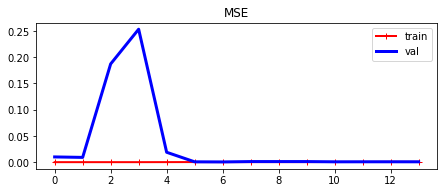

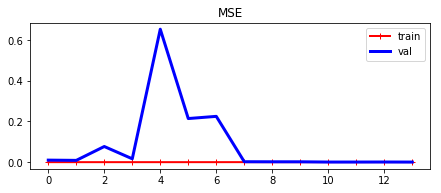

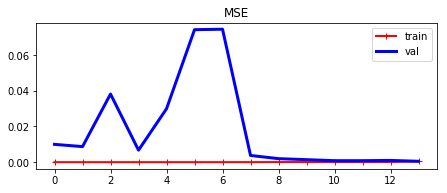

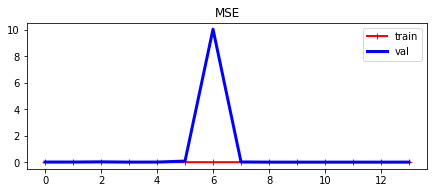

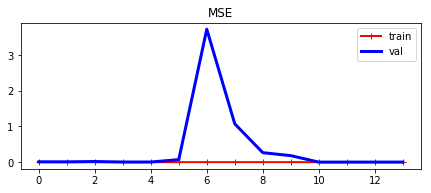

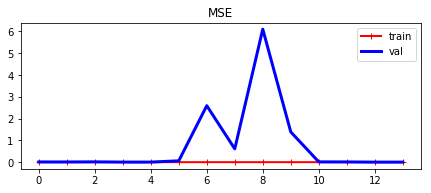

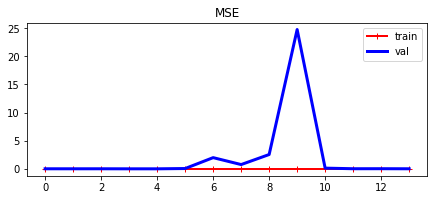

In [11]:
from sklearn.pipeline import Pipeline
import statistics
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.25)

err_val = []
err_train =[]
degrees = np.arange(3, 10)
min_rmse, min_deg = 1e10, 0
for deg in degrees:
    model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=deg,
    include_bias=True)),
    ("lin_reg", LinearRegression()),
    ])

    train_errors, val_errors = [], []

    for m in range(1, len(X_train)):
        model.fit(X_train[:m], Y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)

        # error calculation with mean-squared-error

        train_errors.append(mean_squared_error(Y_train[:m],
        y_train_predict))

        val_errors.append(mean_squared_error(Y_val, y_val_predict))
        
    plt.rcParams["figure.figsize"]=12,12
    fig = plt.subplots()
    
    plt.subplot(5, 2, deg)
    plt.tight_layout()
    plt.title('MSE')
    plt.plot(train_errors, "r-+", linewidth=2, label = 'train')
    plt.plot(val_errors, "b-", linewidth=3, label = 'val') 
    plt.legend(loc='best')

In [7]:
from sklearn.pipeline import Pipeline
# this fuction generate polynomial model with different degrees
def models(deg):
    polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=deg,
    include_bias=True)),
    ("lin_reg", LinearRegression()),
    ])
    return polynomial_regression

# Observation
It seems MSE has lower error among all the error fuctions with value less than 0.01. ALso validation error is coinciding with train error 

In [188]:
# noise variance estimation
def noise_variance(Y,y_predicted):
    er = 0
    for i in range(1,len(Y)):
        e =(y_predicted[i]-Y[i])*(y_predicted[i]-Y[i])
        er += e
    return er/len(Y)
noise = noise_variance(Y,y_predicted)
print(noise)

174.75014552285563


# 

In [108]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

Ridge regression for Simple Linear Regression

In [109]:
regression_coeffs = dict() # Store regression coefficients from each model in a dictionary

regression_coeffs['OLS'] = [np.nan]*2 # Initialize to NaN
regression_coeffs[r'Ridge $\lambda = 0$'] = [np.nan]*2

dfResults = pd.DataFrame(regression_coeffs) # Create dataframe

dfResults.rename({0: r'$\beta_{0}$', 1: r'$\beta_{1}$'}, inplace=True) # Rename rows
dfResults

,OLS,Ridge $\lambda = 0$
$\beta_{0}$,NaN,NaN
$\beta_{1}$,NaN,NaN


In [151]:
X_train, X_val, Y_train, Y_val = train_test_split(u, v, test_size=0.2)

In [156]:
simp_reg = LinearRegression() # build the the ordinary least squares model

simp_reg.fit(X_train, Y_train) # fit the model to training data

# save the beta coefficients
beta0_sreg = simp_reg.intercept_
beta1_sreg = simp_reg.coef_[0]

dfResults['OLS'][:] = [beta0_sreg, beta1_sreg]
dfResults

,OLS,Ridge $\lambda = 0$
$\beta_{0}$,15.519864,15.519864
$\beta_{1}$,-7.310003,-7.310003


In [153]:
#y_predict = lambda x : beta0_sreg + beta1_sreg*x # make predictions
ypredict_ols = simp_reg.predict(X_val)
ypredict_ols.shape

(20,)

In [154]:
from sklearn.linear_model import Ridge 

In [155]:
ridge_reg = Ridge(alpha = 0) # build the ridge regression model with specified lambda, i.e. alpha

ridge_reg.fit(X_train, Y_train) # fit the model to training data

# save the beta coefficients
beta0_ridge = ridge_reg.intercept_
beta1_ridge = ridge_reg.coef_[0]

ypredict_ridge = ridge_reg.predict(X_val) # make predictions everywhere

dfResults[r'Ridge $\lambda = 0$'][:] = [beta0_ridge, beta1_ridge]
dfResults

,OLS,Ridge $\lambda = 0$
$\beta_{0}$,15.519864,15.519864
$\beta_{1}$,-7.310003,-7.310003


The beta coefficients for linear and ridge regressions coincide for λ=0, as expected

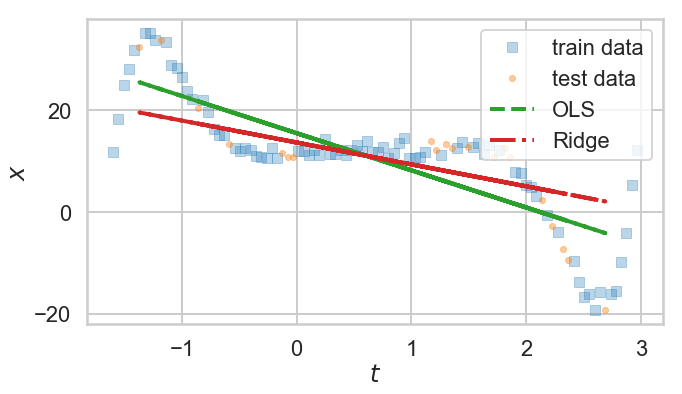

In [160]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(X_train, Y_train, 's', alpha=0.3, ms=10, label="train data") # plot in-sample training data
ax.plot(X_val, Y_val, '.', alpha=0.4, label="test data") # plot population data
#ax.plot(x, f, ls='-',  alpha=0.4, lw=4, label="True function")
ax.plot(X_val, ypredict_ols, ls='--', lw=4, label="OLS") # plot simple linear regression fit
ax.plot(X_val, ypredict_ridge, ls='-.', lw = 4, label="Ridge") # plot ridge regression fit

ax.set_xlabel('$t$')
ax.set_ylabel('$x$')

ax.legend(loc=1);

fig.tight_layout()

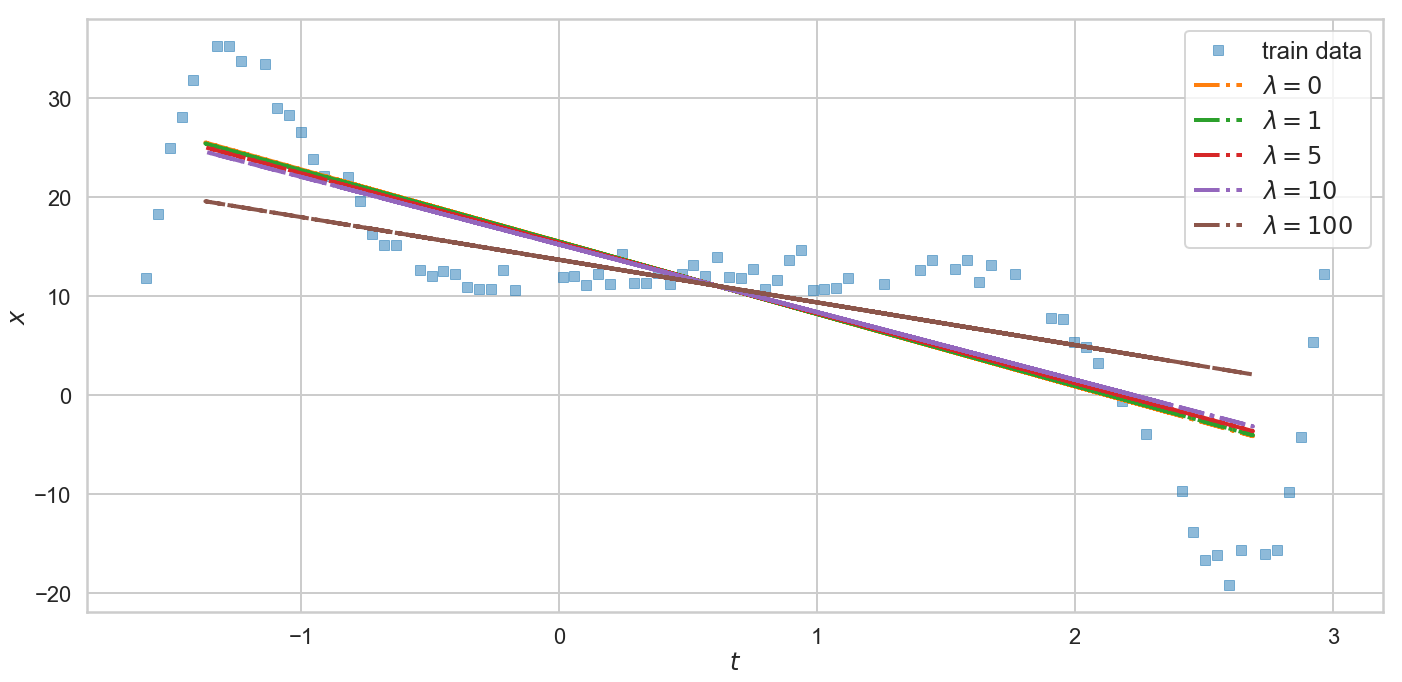

In [159]:
fig, ax = plt.subplots(1,1, figsize=(20,10))

pen_params = [0, 1, 5, 10, 100]

#ax.plot(x, f, ls='-', lw=6, alpha=0.5, label="True function")
ax.plot(X_train, Y_train, 's', alpha=0.5, ms=10, label="train data") # plot in-sample training data

for alpha in pen_params:
    ridge_reg = Ridge(alpha = alpha) # build the ridge regression model with specified lambda, i.e. alpha
    ridge_reg.fit(X_train, Y_train) # fit the model to training data
    ypredict_ridge = ridge_reg.predict(X_val)
    ax.plot(X_val, ypredict_ridge, ls='-.', lw = 4, label=r"$\lambda = {}$".format(alpha)) # plot ridge regression fit

ax.set_xlabel('$t$')
ax.set_ylabel('$x$')

ax.legend(loc=1, fontsize=24);

fig.tight_layout()

fig.savefig('ridge_lambda.png')

In [161]:
from sklearn.preprocessing import PolynomialFeatures

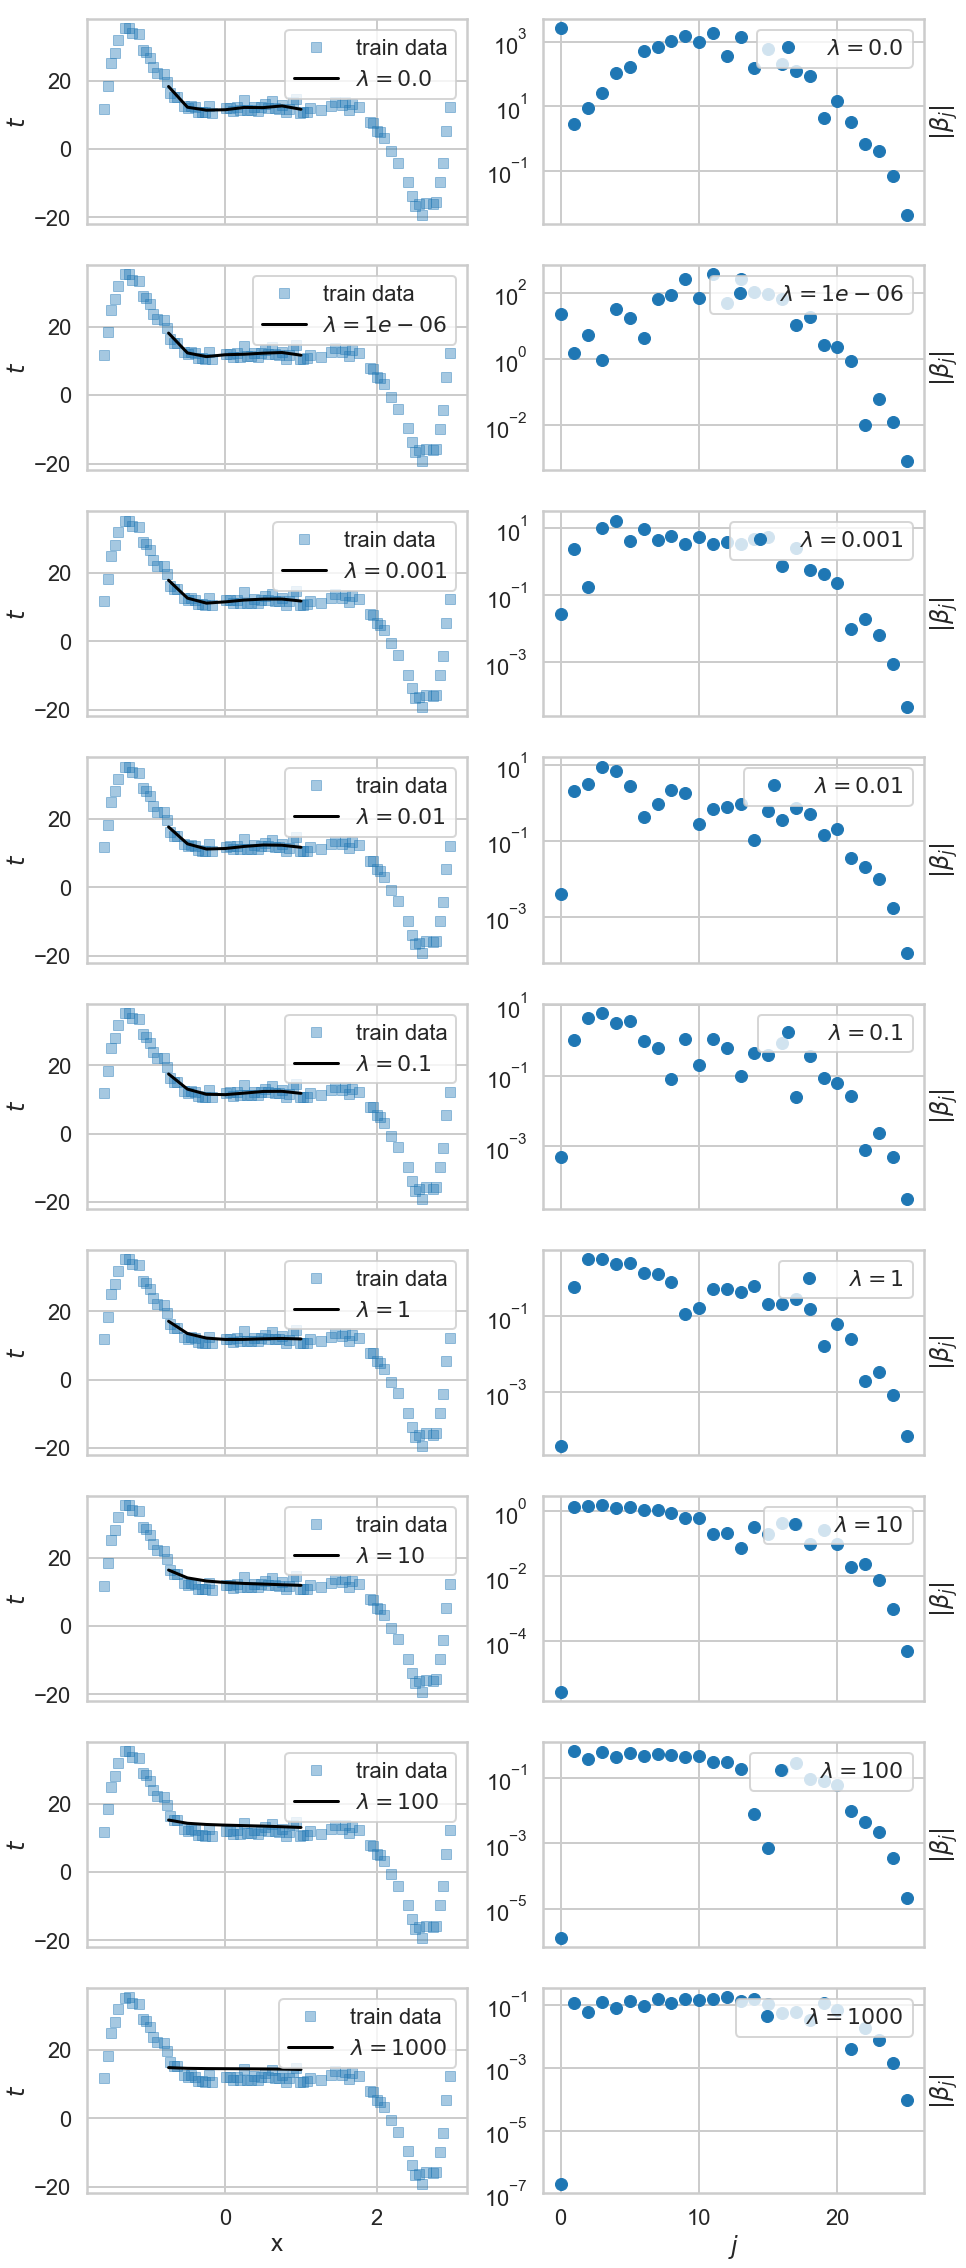

In [174]:
d =25 # Maximum polynomial degree
# You will create a grid of plots of this size (7 x 2)
rows = 9
cols = 2
lambdas = [0., 1e-6, 1e-3, 1e-2, 1e-1, 1, 10,100,1000] # Various penalization parameters to try
grid_to_predict = np.arange(-0.75,1.25,0.25) # Predictions will be made on this grid

# Create training set and test set
Xtrain = PolynomialFeatures(d).fit_transform(X_train)
test_set = PolynomialFeatures(d).fit_transform(grid_to_predict.reshape(-1,1))

fig, axs = plt.subplots(rows, cols, sharex='col', figsize=(15, 40)) # Set up plotting objects

for i, lam in enumerate(lambdas):
    # your code here
    ridge_reg = Ridge(alpha = lam) # Create regression object
    ridge_reg.fit(Xtrain, Y_train) # Fit on regression object
    ypredict_ridge = ridge_reg.predict(test_set) # Do a prediction on the test set
    
    ### Provided code
    axs[i,0].plot(X_train, Y_train, 's', alpha=0.4, ms=10, label="train data") # Plot sample observations
    axs[i,0].plot(grid_to_predict, ypredict_ridge, 'k-', label=r"$\lambda =  {0}$".format(lam)) # Ridge regression prediction
    axs[i,0].set_ylabel('$t$') # y axis label
    #axs[i,0].set_ylim((0, 1)) # y axis limits
    #axs[i,0].set_xlim((0, 1)) # x axis limits
    axs[i,0].legend(loc=1) # legend
    
    coef = ridge_reg.coef_.ravel() # Unpack the coefficients from the regression
    
    axs[i,1].semilogy(np.abs(coef), ls=' ', marker='o', label=r"$\lambda =  {0}$".format(lam)) # plot coefficients
   # axs[i,1].set_ylim((1e-04, 1e+15)) # Set y axis limits
    #axs[i,1].set_xlim(1, 20) # Set y axis limits
    axs[i,1].yaxis.set_label_position("right") # Move y-axis label to right
    axs[i,1].set_ylabel(r'$\left|\beta_{j}\right|$') # Label y-axis
    axs[i,1].legend(loc=1) # Legend

# Label x axes
axs[-1, 0].set_xlabel("x")
axs[-1, 1].set_xlabel(r"$j$");

As you can see, as we increase λ from 0 to 1, we start out overfitting, then doing well, and then our fits develop a mind of their own irrespective of data, as the penalty term dominates.

In [175]:
from sklearn.model_selection import GridSearchCV
def cv_optimize_ridge(x: np.ndarray, y: np.ndarray, list_of_lambdas: list, n_folds: int =4):
    est = Ridge()
    parameters = {'alpha': list_of_lambdas}
    # the scoring parameter below is the default one in ridge, but you can use a different one
    # in the cross-validation phase if you want.
    gs = GridSearchCV(est, param_grid=parameters, cv=n_folds, scoring="neg_mean_squared_error")
    gs.fit(x, y)
    return gs

Use the function above to fit the model on the training set with 4-fold cross validation. Save the fit as the variable fitmodel.

In [176]:
lambs = [1e-8, 1e-6, 1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0]
# your code here
fitmodel = cv_optimize_ridge(Xtrain, Y_train, lambs, n_folds=4)

In [177]:
print(fitmodel.best_estimator_, "\n")
print(fitmodel.best_params_, "\n")
print(fitmodel.best_score_, "\n")

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) 

{'alpha': 10.0} 

-4.856840310109792 



We also output the mean cross-validation error at different λ (with a negative sign, as scikit-learn likes to maximize negative error which is equivalent to minimizing error).

In [71]:
fitmodel.cv_results_

{'mean_fit_time': array([0.00249326, 0.00209337, 0.00187033, 0.00223792, 0.00124073,
        0.00128931, 0.00149602, 0.00110817, 0.00144035, 0.00124651,
        0.00173289]),
 'std_fit_time': array([0.00049806, 0.00018986, 0.00053993, 0.00043323, 0.00043411,
        0.00043177, 0.00049812, 0.00015483, 0.00044381, 0.00042972,
        0.00078002]),
 'mean_score_time': array([0.00076014, 0.00038421, 0.00074476, 0.00050145, 0.00024909,
        0.00070155, 0.00024962, 0.00092638, 0.00061524, 0.00074708,
        0.00078028]),
 'std_score_time': array([0.00043898, 0.00041652, 0.00043005, 0.00050158, 0.00043143,
        0.00041205, 0.00043236, 0.00019475, 0.00045433, 0.00043133,
        0.00045353]),
 'param_alpha': masked_array(data=[1e-08, 1e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001,
                    0.01, 0.1, 1.0, 10.0],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False],
        fill_value='?',
             dtype=object),

In [178]:
fit_lambdas = [d['alpha'] for d in fitmodel.cv_results_['params']]
fit_scores = fitmodel.cv_results_['mean_test_score']

Now we make a log-log plot of -fit_scores versus fit_lambdas.

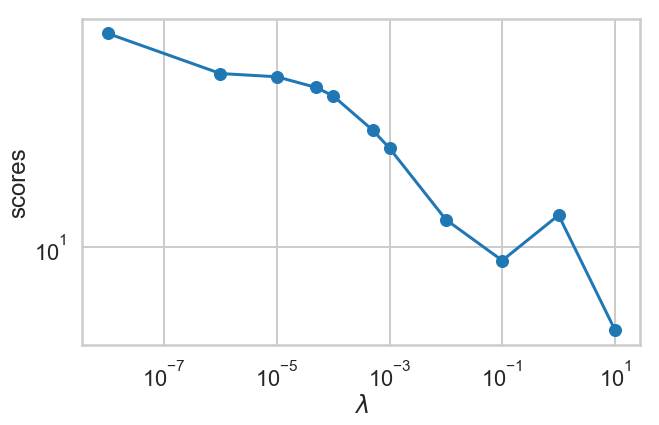

In [179]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(fit_lambdas, -fit_scores, ls='-', marker='o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$\lambda$')
ax.set_ylabel('scores');

In [180]:
from sklearn.model_selection import cross_val_score

lr_object =  Ridge(alpha=0)
cross_val_score(lr_object, Xtrain, Y_train, cv=5)

array([ 0.98286482, -1.55178829,  0.97059313,  0.9929578 ,  0.97944914])

In [76]:
for cur_alpha in [1e-8, 1e-4, 1e-2, 1.0, 10.0]:
    lr_object =  Ridge(alpha=cur_alpha)
    scores = cross_val_score(lr_object, Xtrain, Y_train, cv=5)
    print("lambda {0}\t R^2 scores: {1}\t Mean R^2: {2}".format(cur_alpha,scores,np.mean(scores)))

lambda 1e-08	 R^2 scores: [ -1060.42422976 -13544.9310863   -2509.38036312    -36.23737054
    -20.36412059]	 Mean R^2: -3434.2674340640924
lambda 0.0001	 R^2 scores: [  -1.34014221  -14.78599213 -132.56140863  -11.26430798   -0.64791971]	 Mean R^2: -32.119954131946194
lambda 0.01	 R^2 scores: [  0.93758698   0.80220771   0.76227643 -20.29554007  -0.87367587]	 Mean R^2: -3.7334289621780123
lambda 1.0	 R^2 scores: [ -0.09930719   0.77819968  -0.25962273 -56.34089141  -7.96041977]	 Mean R^2: -12.776408283874783
lambda 10.0	 R^2 scores: [  -0.35893956    0.28410168   -2.53204388 -105.52794031  -10.26039533]	 Mean R^2: -23.679043478557116


In [79]:
from sklearn.linear_model import RidgeCV

ridgeCV_object = RidgeCV(alphas=(1e-8, 1e-4, 1e-2, 1.0, 10.0), cv=5)
ridgeCV_object.fit(Xtrain, Y_train)
print("Best model searched:\nalpha = {}\nintercept = {}\nbetas = {}, ".format(ridgeCV_object.alpha_,
                                                                            ridgeCV_object.intercept_,
                                                                            ridgeCV_object.coef_
                                                                            )
     )

Best model searched:
alpha = 0.01
intercept = 7.992929844452785
betas = [ 0.         -0.09033538  0.35586754 -0.34210477  0.1904485  -0.1191102
  0.08623301 -0.04634857  0.04124388 -0.02261591  0.0209722  -0.01179648
  0.01197766 -0.00564209  0.00724989 -0.00317925  0.00305193 -0.00374588
 -0.00070137 -0.00364334  0.00143543], 


In [181]:
# declare and pass a KFold object to properly shuffle the training data, and/or set the random state
from sklearn.model_selection import KFold
splitter = KFold(5, random_state=42, shuffle=True)

ridgeCV_object = RidgeCV(alphas=(1e-8, 1e-4, 1e-2, 1.0, 10.0), cv=splitter)
ridgeCV_object.fit(Xtrain, Y_train)
print("Best model searched:\nalpha = {}\nintercept = {}\nbetas = {}, ".format(ridgeCV_object.alpha_,
                                                                            ridgeCV_object.intercept_,
                                                                            ridgeCV_object.coef_
                                                                            )
     )

Best model searched:
alpha = 10.0
intercept = 12.697290434087275
betas = [-2.77445719e-06 -1.32564283e+00  1.40548381e+00 -1.53249570e+00
  1.27501780e+00 -1.36349544e+00  1.06263936e+00 -1.05267424e+00
  8.61779666e-01 -6.28783771e-01  6.15767451e-01 -1.92467437e-01
  2.05909989e-01  7.52580346e-02 -3.26328057e-01  1.97960759e-01
 -4.23957090e-01  3.92184962e-01  9.43182304e-02 -2.70076055e-01
  1.00484914e-01  1.96125749e-02 -2.44781218e-02  7.34614946e-03
 -9.86240604e-04  5.07946755e-05], 


At this point, we have determined the best penalization parameter for the ridge regression on our current dataset using cross validation. Let's refit the estimator on the training set and calculate and plot the test set error and the polynomial coefficients. Notice how many of these coefficients have been pushed to lower values or 0.

In [182]:
# your code here
best_lambda = fitmodel.best_params_['alpha']
est = Ridge(alpha=best_lambda).fit(Xtrain,Y_train)
ypredict_ridge_best = est.predict(test_set)
est.coef_

array([-2.77445719e-06, -1.32564283e+00,  1.40548381e+00, -1.53249570e+00,
        1.27501780e+00, -1.36349544e+00,  1.06263936e+00, -1.05267424e+00,
        8.61779666e-01, -6.28783771e-01,  6.15767451e-01, -1.92467437e-01,
        2.05909989e-01,  7.52580346e-02, -3.26328057e-01,  1.97960759e-01,
       -4.23957090e-01,  3.92184962e-01,  9.43182304e-02, -2.70076055e-01,
        1.00484914e-01,  1.96125749e-02, -2.44781218e-02,  7.34614946e-03,
       -9.86240604e-04,  5.07946755e-05])

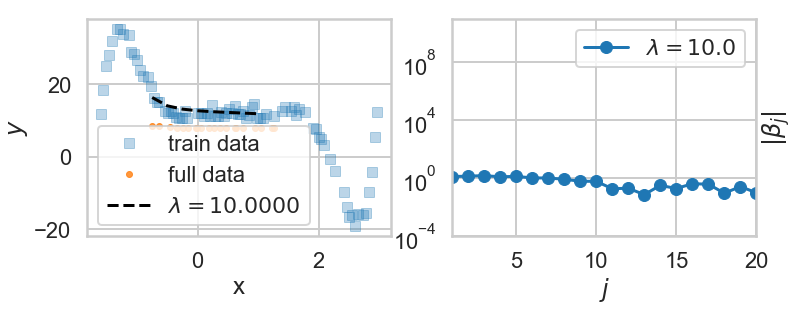

In [184]:
# code provided from here on
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
left = 0
right = 1

#axs[left].plot(x,f, lw=4, label='True Response')
axs[left].plot(X_train, Y_train, 's', alpha=0.3, ms=10, label="train data")
axs[left].plot(X, Y, '.', alpha=0.8, label="full data")
axs[left].plot(grid_to_predict, ypredict_ridge_best, 'k--', label=r"$\lambda =  {{{0:1.4f}}}$".format(best_lambda))
axs[left].set_ylabel('$y$')
#axs[left].set_ylim((0, 1))
#axs[left].set_xlim((0, 1))
axs[left].legend(loc='best')
coef = est.coef_.ravel()
axs[right].semilogy(np.abs(coef), marker='o', label=r"$\lambda =  {0}$".format(best_lambda))
axs[right].set_ylim((1e-04, 1.0e+11))
axs[right].set_xlim(1, 20)
axs[right].yaxis.set_label_position("right")
axs[right].set_ylabel(r'$\left|\beta_{j}\right|$')
axs[right].legend(loc=1)
axs[left].set_xlabel("x")
axs[right].set_xlabel(r'$j$');

In [185]:
#One more nice plot:
from sklearn.linear_model import Lasso 

ridge_coef = []
lasso_coef = []
for lamb in lambs:
    ridge_coef.append(Ridge(alpha=lamb).fit(Xtrain,Y_train).coef_)
    lasso_coef.append(Lasso(alpha=lamb).fit(Xtrain,Y_train).coef_)
ridge_coef[0:2]

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 318.2743141225613, tolerance: 1.1525344189832287
  positive)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 318.2763332057382, tolerance: 1.1525344189832287
  positive)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 318.2946883472952, tolerance: 1.1525344189832287
  positive)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 318.3

[array([ 1.06298815e+03,  2.75454790e+00,  7.83282891e+00, -2.59894233e+01,
        -9.25928550e+01,  1.58429638e+02,  4.74818774e+02, -6.71451070e+02,
        -9.60598937e+02,  1.45158391e+03,  9.15204475e+02, -1.78036142e+03,
        -3.08933187e+02,  1.29411265e+03, -1.62086765e+02, -5.46523116e+02,
         2.00208263e+02,  1.16340958e+02, -7.98006049e+01, -3.45098167e+00,
         1.39843192e+01, -3.10149553e+00, -6.21738570e-01,  3.91224924e-01,
        -6.67129209e-02,  4.06815351e-03]),
 array([ 2.37214967e+01,  1.53141348e+00, -5.35619005e+00, -9.12848046e-01,
         3.23949281e+01, -1.74615291e+01,  4.21163382e+00, -6.39163114e+01,
        -8.59572049e+01,  2.59098573e+02,  6.80000851e+01, -3.63622858e+02,
         5.07133781e+01,  2.56841634e+02, -1.05388517e+02, -9.13257579e+01,
         6.50627586e+01,  1.06559984e+01, -1.88130882e+01,  2.64082568e+00,
         2.29374698e+00, -8.69668246e-01, -1.00029028e-02,  6.05317987e-02,
        -1.24319567e-02,  8.28620192e-04])]

Text(0.5,1,'Lasso poly coeffs as a function of lambda')

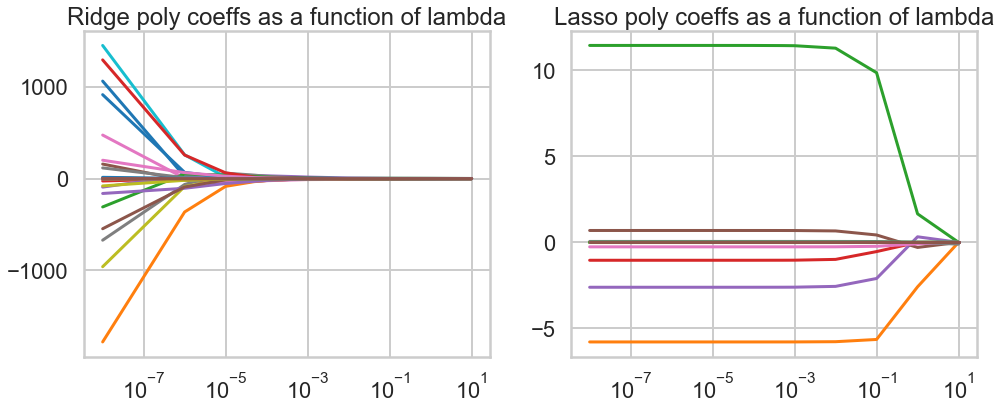

In [186]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
left = 0
right = 1
axs[left].plot(lambs,ridge_coef)
axs[left].set_xscale("log")
axs[left].set_title("Ridge poly coeffs as a function of lambda")
#axs[left].legend(loc='best')
axs[right].plot(lambs,lasso_coef)
axs[right].set_xscale("log")
axs[right].set_title("Lasso poly coeffs as a function of lambda")

Presumably the orange line in the Lasso plot is for the linear term (it becomes important as the other terms "drop out").

# Part 1B

In [145]:
df = pd.read_csv(r"C:\Users\hp\Downloads\HAPT Data Set\NonGaussian_noise.csv",names=["X", "t"])
print(df.shape)
#df1 = df.iloc[0:20,:] # taking first 20 sample data points
# extracting features and target set of data "d"
#U = d.iloc[:,0:1]
#V = d.iloc[:,1]
# extracting features and target set of data "data"
u = df.iloc[:,0:1]
v = df.iloc[:,1]
print(df.head())
df.describe()

(100, 2)
         X       t
0  1.90630   7.846
1 -1.46260  28.116
2 -1.27800  35.332
3  0.10648  11.141
4  1.49090  12.746


,X,t
count,100.000000,100.000000
mean,0.683331,10.802743
std,1.338829,12.129903
min,-1.601000,-19.366000
25%,-0.458835,10.675750
50%,0.683335,12.036000
75%,1.825525,13.776250
max,2.967700,35.332000


Text(0.5,1,'Plotting the data')

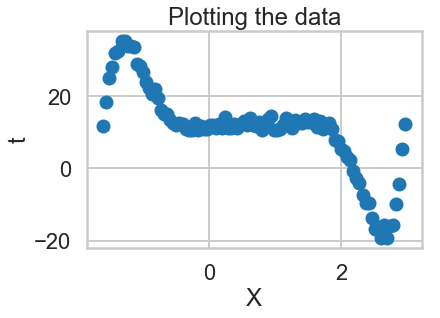

In [147]:
plt.scatter(df['X'],df['t'])
plt.xlabel('X')
plt.ylabel('t')
plt.title('Plotting the data')

In [148]:
poly = PolynomialFeatures(degree = 14) # this is the model
X_poly = poly.fit_transform(u) 
  
poly.fit(X_poly, v) 
polynomial_model= LinearRegression() 
polynomial_model.fit(X_poly, v)
coefficient = polynomial_model.coef_  # coe
intercept = polynomial_model.intercept_ #intercept
print(intercept)
print(coefficient)
y_predicted = polynomial_model.predict(poly.fit_transform(u))

11.34323953927949
[ 0.          2.36410495  4.54764445 -9.61340484 -0.77984886 -3.0562964
 11.20954851  2.10060978 -9.1739635   1.53298556  2.29842119 -0.7980737
 -0.15314098  0.10401358 -0.01265165]


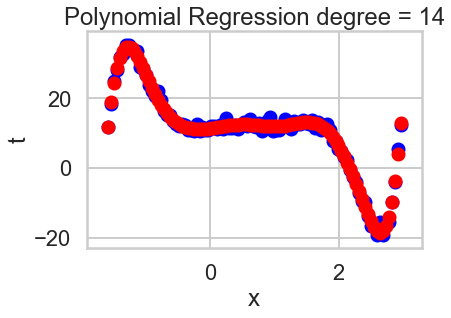

In [149]:
# Visualising the Polynomial Regression results 

plt.scatter(u, v, color = 'blue') 
  
plt.scatter(u, y_predicted , color = 'red') 
plt.title('Polynomial Regression degree = 14') 
plt.xlabel('x') 
plt.ylabel('t') 
  
plt.show() 

In [150]:
# noise variance estimation
def noise_variance(v,y_predicted):
    er = 0
    for i in range(1,len(v)):
        e =(y_predicted[i]-v[i])*(y_predicted[i]-v[i])
        er += e
    return er/len(y)
noise = noise_variance(v,y_predicted)
print(noise)

0.9350343269472999
